In [3]:
import numpy as np
import numpy.ma as ma
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
from matplotlib import gridspec

import sys
sys.path.append('/scratch9/mkron/software/DeepIceLearning/Plots')
import plot_functions_mk as pfmk

In [4]:
RUNS = ["06"]

In [5]:
for i in xrange(len(RUNS)):
    DATA_DIR = "/scratch9/mkron/data/NN_out/run{}/".format(RUNS[i])
    print "RUN {}".format(RUNS[i])
    #predictions_mctrue = pickle.load(file(os.path.join(DATA_DIR, 'prediction.pickle')))
    epochs_acc_loss = np.delete(np.genfromtxt(os.path.join(DATA_DIR, "loss_logger.csv"), delimiter=','), 0, axis=0).T
    acc_val_1 = epochs_acc_loss[10]
    acc_val_2 = epochs_acc_loss[12]
    acc_val_3 = epochs_acc_loss[14]
    acc_val_4 = epochs_acc_loss[16]
    sum_acc_val = acc_val_1 + acc_val_2 + acc_val_3 + acc_val_4
    print "ACC for the single Targets of the overall best epoch"
    print "Overall Performence: {}%".format(round(np.max(sum_acc_val)/4*100, 2))
    print "Acc on Validation Set of Target 1 Event Type : {}%".format(round(np.max(acc_val_1[np.argmax(sum_acc_val)])*100 ,2))
    print "Acc on Validation Set of Target 2 Starting   : {}%".format(round(np.max(acc_val_2[np.argmax(sum_acc_val)])*100 ,2))
    print "Acc on Validation Set of Target 3 Coincidence: {}%".format(round(np.max(acc_val_3[np.argmax(sum_acc_val)])*100 ,2))
    print "Acc on Validation Set of Target 3 UpDown     : {}%".format(round(np.max(acc_val_4[np.argmax(sum_acc_val)])*100 ,2))
    print "\n"

RUN 06
ACC for the single Targets of the overall best epoch
Overall Performence: 75.57%
Acc on Validation Set of Target 1 Event Type : 88.3%
Acc on Validation Set of Target 2 Starting   : 82.1%
Acc on Validation Set of Target 3 Coincidence: 66.14%
Acc on Validation Set of Target 3 UpDown     : 65.72%




In [19]:
RUNS = [69, 72]

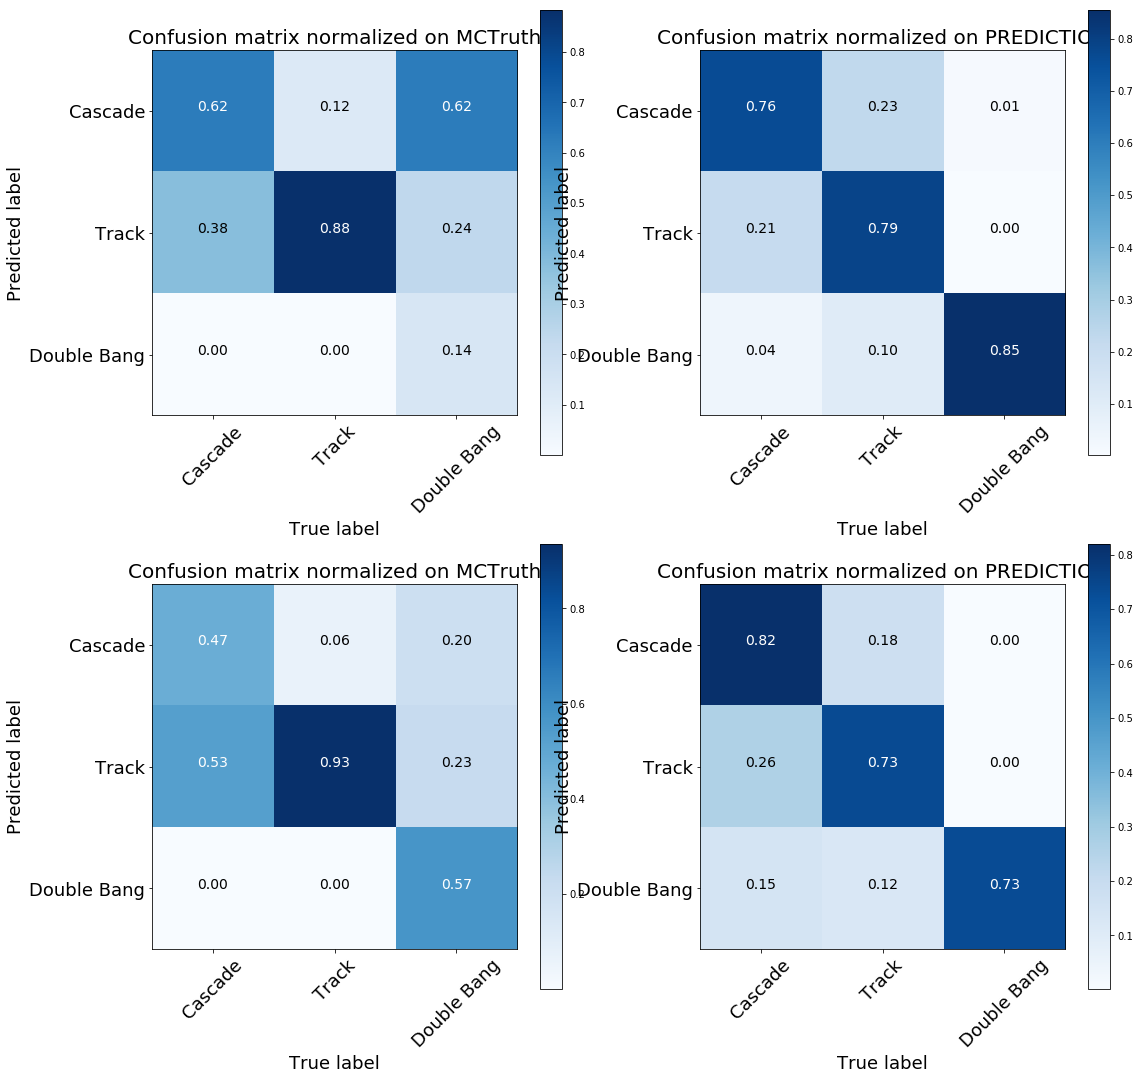

In [20]:
fig = plt.figure(figsize=(18, len(RUNS)*9))
for i in xrange(len(RUNS)):
    DATA_DIR = "/scratch9/mkron/data/NN_out/run{}/".format(RUNS[i])
    predictions_mctrue = pickle.load(file(os.path.join(DATA_DIR, 'prediction.pickle')))
    
    pred_label_1 = predictions_mctrue["prediction"][0] #list with probability for each class
    true_label_1 = predictions_mctrue["mc_truth"]["ClassificationLabel_truth"][:len(pred_label_1)]-1

    pred_for_class1 = pred_label_1[true_label_1 == 0]
    pred_for_class2 = pred_label_1[true_label_1 == 1]
    pred_for_class3 = pred_label_1[true_label_1 == 2]

    classes = ("Cascade", "Track", "Double Bang")

    absolute, xe,ye = np.histogram2d(np.argmax(pred_label_1, axis=1), true_label_1, bins=(len(classes),len(classes)))
    # that means that the prediction has to correspond to a event type 
    res_true = absolute/np.sum(absolute,axis=0)
    # normalization if the absolute values, so that the sum over PREDICTION is 1
    # that means that a event hast to be predicted as one type 
    res_pred = absolute/np.sum(absolute,axis=1).reshape(-1,1)
    
    ax1 = plt.subplot2grid((len(RUNS), 2), (i, 0))
    pfmk.plot_confusion_matrix(res_true, classes=classes, title='Confusion matrix normalized on MCTruth')

    ax2 = plt.subplot2grid((len(RUNS), 2), (i, 1))
    pfmk.plot_confusion_matrix(res_pred, classes=classes, title='Confusion matrix normalized on PREDICTION')